# Perpetual American Options

Click here for an interactive version of this notebook:-
[![Binder](https://mybinder.org/badge.svg)](https://mybinder.org/v2/gh/pjohno/MSc-Math-Finance-2018/master?filepath=notebooks%2FMSc%20Project%209%20-%20Free%20Boundaries.ipynb)


Consider the well-known Black and Scholes (1973) partial differential equation for an option with an underlying
asset following geometric Brownian motion:
$$
\frac{\partial{V}}{\partial{t}} + \frac{1}{2} {\sigma}^2 S^2
\frac{\partial {^2V}}{\partial{S^2}} + (r-D_c) S
\frac{\partial{V}}{\partial{S}} - rV = 0,
$$
where $V(S,t)$ is the price of the derivative product, $S$ the
current value of the underlying asset, $t$ is time,  $T$ is the time to maturity
 $r$ the risk-free interest rate, $\sigma$ the
volatility of the underlying asset and $X$ is the exercise price of the option. 
$D_c$ is a continuous dividend yield which could, for example, be the foreign 
interest rate in a foreign exchange option.

## Perpetual American Put Option

Consider a perpetual American put option with the conditions
$$
V(S,T;T) = \max( X - S ,0)
$$
$$
V(S,t,T) \geq X - S \quad \forall t<T
$$
and we look at the limit for large maturities, so that
$$
\lim_{T\rightarrow\infty} V(S,t;T) = V(S) .
$$

Then a solution can be found of the form 
$$
V(S) = A S^{\alpha^-} + B S^{\alpha^+}
$$
where $\alpha^+_-$ denotes the solution to the determinant equation
$$
\frac12 \alpha(\alpha-1) + r\alpha - r = 0 .
$$


The following conditions can be used to derive $A$ and $B$:
$$
V(S_f) = X - S_f
$$
$$
V'(S_f) = - 1
$$
$$
V\rightarrow 0 \text{ as } S\rightarrow \infty
$$

## Perpetual American Call Option

We seek a solution of the form 
$$
V(S) = A S^{\alpha^-} + B S^{\alpha^+}
$$
with the following conditions can be used to derive $A$ and $B$:
$$
V(S_f) = S_f - X
$$
$$
V'(S_f) = 1
$$
$$
V \rightarrow 0 \text{ as } S\rightarrow 0
$$

In [1]:
#include <iostream>
#include <algorithm>
#include <fstream>
#include <cmath>
#include <vector>
#include <cstdlib>
#include <sstream>

In [2]:
.L boost_system

In [3]:
#include "msc_gnuplot_image.hpp"

Create a class for the perpetual put and call option. The idea is that the user supplies parameters to the class, upon which $A$ and $S_f$ are calculated.

In [4]:
class PerpetualPutOption
{
  
    double X,A,alpha,Sf;
    
public:
    
    PerpetualPutOption(double X,double r,double D0,double sigma):X(X)
    {
        double rDhalfsig2 = r-D0-0.5*sigma*sigma;
        double d = rDhalfsig2*rDhalfsig2 + 2*r*sigma*sigma;
        alpha = (-rDhalfsig2 - sqrt(d))/sigma/sigma;
        Sf = X/(1-1./alpha);
        A = -1./alpha*pow(Sf,1-alpha);
    }
    
    double operator()(double S) const { 
        if(S < Sf)
            return X - S;
        else
            return A*pow(S,alpha);
    }
    
    double getSf() const {return Sf;}
    
};

In [5]:
class PerpetualCallOption
{
  
    double X,A,alpha,Sf;
    
public:
    
    PerpetualCallOption(double X,double r,double D0,double sigma):X(X)
    {
        double rDhalfsig2 = r-D0-0.5*sigma*sigma;
        double d = rDhalfsig2*rDhalfsig2 + 2*r*sigma*sigma;
        alpha = (-rDhalfsig2 + sqrt(d))/sigma/sigma;
        Sf = X/(1-1./alpha);
        A = 1./alpha*pow(Sf,1-alpha);
    }
    
    double operator()(double S) const { 
        if(S > Sf)
            return S - X;
        else
            return A*pow(S,alpha);
    }
    
    double getSf() const {return Sf;}
    
};


Add some parameters and vectors for plotting.

In [6]:
double X;
double r;
double d;
double sigma;
PerpetualPutOption P(X,r,d,sigma);
PerpetualCallOption C(X,r,d,sigma);
int n=200;
std::vector<double> Svalues(n+1);
std::vector<std::vector<double>> Option_values(4,std::vector<double>(n+1));
double dS;


Put in some values and plot the graphs against $S$, giving both the option value and it's payoff.

In [7]:
X = 1;
r = 0.04;
d = 0.04;
sigma = 0.2;
dS = 2*X/n;
P = {X,r,d,sigma};
C = {X,r,d,sigma};
for(int i = 0;i<=n;i++)
{
    Svalues[i] = i*dS;
    Option_values[0][i] = P(Svalues[i]);
    Option_values[1][i] = std::max(X-Svalues[i],0.);
    Option_values[2][i] = C(Svalues[i]);
    Option_values[3][i] = std::max(Svalues[i]-X,0.);
}

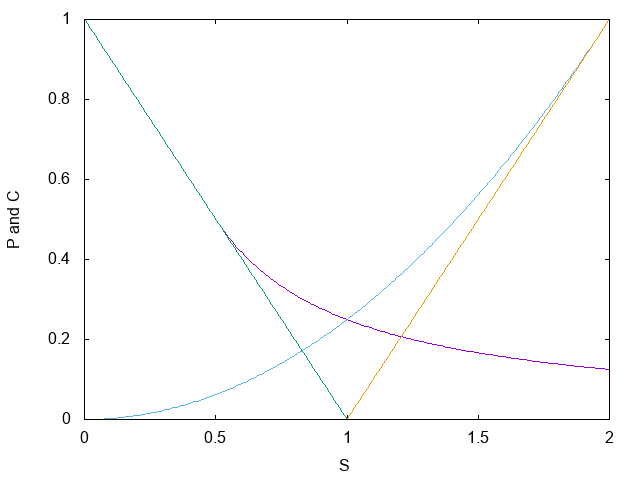

In [8]:
// plot the figure
{
    // add labels on the x/y axis
    std::stringstream ss("set xlabel \"S\"\n set ylabel \"P and C\"");
    // put the plot in figure1
    GPLT::figure = GPLT::G.plotData(Svalues,Option_values,&ss);
}
// show figure
GPLT::figure

See the full code solution on github [click here](https://github.com/pjohno/MSc-Math-Finance-2018/blob/master/main/project-7-free-boundaries.cpp).